<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/COLA_CON_DOS_SERVIDORES_EN_PARALELO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COLA CON DOS SERVIDORES EN PARALELO

Al tener solo una cola que da servicio a todos los puestos se debe identifixar los elementos que interactuan y e orden en el que se encuentra en cada instante.

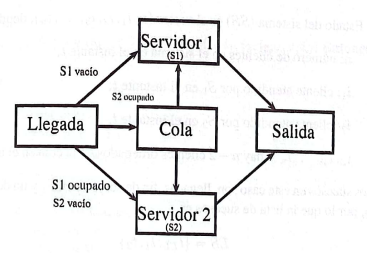

El esquema anterior explica de manera más visual el comportamiento de este sistema.
Las variables que interactuan son las siguiente:


*   t: tiempo
*  NLL : número de llegadas hasta t
* C: número de clientes servidos por S1 hasta t
* C": número de clientes servidos por S2 hasta t
* n : número d eclientes en el sistema en el instante t
* i1: cliente atendido por S1 en el instante t
* i2: cliente atendido por S2 en el instante t
* i3,...,in si hay n-2 clientes ordenados en la cola en el instante t



In [213]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

A continuación generamos la funciones para calcular los tiempos de llegasa y de servicio utilizando una tasa de llegada de poisson

In [214]:
def t_llegada():
    return random.expovariate(1.0)  # Tasa de llegada

In [215]:
#Generación del tiempo de servicio
def tserv():
  return random.expovariate(1.0)

En el sisguiente codigo desarrollamos el pseudocodigo del libro con ligeros ajustes, registrando los tiempos de llegada, se salida, el servidor en el que el usuario ingresa y los que estan en la cola.

In [234]:
# prompt: Sin la linea azul

import random
import numpy as np
import math
import matplotlib.pyplot as plt
import heapq


# Inicialización de variables
T = 30 #Tiempo de atención (60 min)
t = 0
C1 = 0  # Clientes servidos por S1
C2 = 0  # Clientes servidos por S2
n = 0   # Número de clientes en el sistema
NLL = 0 # Número de llegadas hasta t
SS = [0, None, None]  # Estado del sistema: [n, i1, i2]
LL = []   # Instantes de llegada de cada cliente
S = []    # Instantes de salida de cada cliente
event_queue = []  # Cola de eventos (tiempo, tipo_evento)
TL = [] #Tiempo de llegada
TS = [] #Tiempo de salidas
NC = []
Cin = []
Cout = []

# Planificar un evento
def planificar_evento(tiempo, tipo_evento, cliente_id=None):
    heapq.heappush(event_queue, (tiempo, tipo_evento, cliente_id))

# Inicio de la simulación
tLL = t_llegada()
planificar_evento(tLL, 'llegada')

# Bucle de simulación
while event_queue:
    # Obtener el siguiente evento
    t, evento, cliente_id = heapq.heappop(event_queue)

    if evento == 'llegada':
        # Llega un cliente
        NLL += 1
        n += 1
        LL.append(t)  # Registrar el tiempo de llegada
        TL.append(t)
        NC.append(NLL)

        # Revisar disponibilidad de servidores
        if SS[1] is None:
            # Servidor S1 está libre
            SS[1] = NLL
            C1 += 1
            t1 = t + tserv()
            planificar_evento(t1, 'i1', NLL)
            Cin.append('S1')

        elif SS[2] is None:
            # Servidor S2 está libre
            SS[2] = NLL
            C2 += 1
            t2 = t + tserv()
            planificar_evento(t2, 'i2', NLL)
            Cin.append('S2')

        else:
            # Ambos servidores ocupados, cliente en la cola
            print(f"C{NLL} en cola")

        # Programar próxima llegada
        tLL = t + t_llegada()
        planificar_evento(tLL, 'llegada')

    elif evento == 'i1':
        # Cliente sale del servidor S1
        Cout.append('S1')
        TS.append(t)
        S.append((SS[1], t))  # Registrar salida
        SS[1] = None
        n -= 1

        # Si hay más clientes en la cola, asignar al siguiente cliente a S1
        if n > 0 and SS[2] is not None:
            cliente_en_cola = NLL - n + 1  # El siguiente cliente de la cola
            SS[1] = cliente_en_cola
            C1 += 1
            t1 = t + tserv()
            planificar_evento(t1, 'i1', cliente_en_cola)
            Cin.append('S1')

    elif evento == 'i2':
        # Cliente sale del servidor S2
        Cout.append('S2')
        TS.append(t)
        S.append((SS[2], t))  # Registrar salida
        SS[2] = None
        n -= 1

        # Si hay más clientes en la cola, asignar al siguiente cliente a S2
        if n > 0 and SS[1] is not None:
            cliente_en_cola = NLL - n + 1  # El siguiente cliente de la cola
            SS[2] = cliente_en_cola
            C2 += 1
            t2 = t + tserv()
            planificar_evento(t2, 'i2', cliente_en_cola)
            Cin.append('S2')

    # Condición de parada: se detiene tras 100 clientes servidos
    if t >= T:
        break

print(f"Número total de llegadas: {NLL}")
print(f"Clientes servidos por S1: {C1}")
print(f"Clientes servidos por S2: {C2}")
print(f"Clientes totales servidos: {C1 + C2}")
print(f"Instantes de salida: {S}")


C14 en cola
Número total de llegadas: 28
Clientes servidos por S1: 20
Clientes servidos por S2: 9
Clientes totales servidos: 29
Instantes de salida: [(1, 0.5477304529423717), (2, 0.7992398545093871), (3, 1.7988280870233515), (4, 3.033881916341153), (6, 5.894455553425678), (6, 6.088489583334769), (5, 7.791332942679861), (7, 8.735568613382432), (8, 10.309061749640252), (9, 11.090308826518612), (10, 13.058435868763855), (11, 14.219935125496185), (13, 15.270827125859476), (14, 15.344553848650232), (15, 16.63921819701792), (12, 17.052793550393154), (16, 18.1388162513151), (17, 20.128447826442514), (19, 23.05648488522157), (18, 23.335742460878436), (20, 25.47636149653574), (21, 25.888916113362466), (22, 25.977863594891826), (24, 26.95259269953215), (25, 27.70555176108407), (23, 27.85592929219489), (26, 28.807261392116768), (27, 30.203379149510425)]


En la siguiente celda guardamos los tiempos de salida en un vector, al igual que los servidores por usuario. Para porder crear una gráfica utilizando pandas.

In [235]:
TS = [] #Tiempos de salida
for cliente, tiempo in S:
    TS.append(tiempo)

In [244]:
import pandas as pd

# Crear un DataFrame de pandas
df = pd.DataFrame({'#C': NC, 'Tin': LL, 'Servidor': Cout, 'TOut': TS})

# Imprimir la tabla
df

,#C,Tin,Servidor,TOut
0,1,0.376571,S1,0.547730
1,2,0.591258,S1,0.799240
2,3,1.259670,S1,1.798828
3,4,2.339742,S1,3.033882
4,5,3.109245,S2,5.894456
5,6,3.367221,S2,6.088490
6,7,7.600072,S1,7.791333
7,8,9.507023,S2,8.735569
8,9,10.541242,S1,10.309062
9,10,12.018677,S1,11.090309


Graficamos los tiempos de entrada y de salida de cada uno de los usuarios utlizando la función plt.step

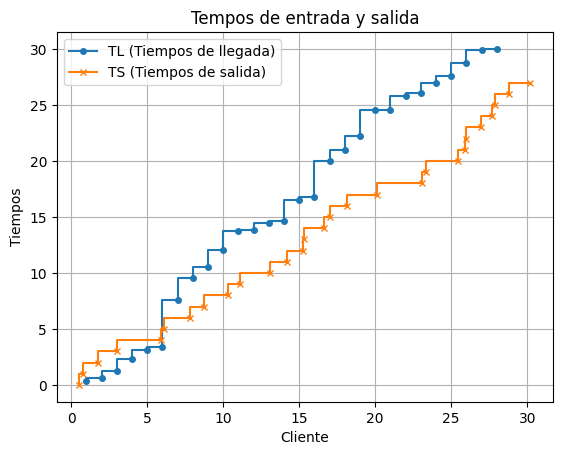

In [243]:
plt.step(NC,TL,label='TL (Tiempos de llegada)',marker='o', linestyle='-',markersize=4)
plt.step(TS,list(range(len(TS))),label='TS (Tiempos de salida)',marker='x', linestyle='-',markersize=4)
plt.xlabel("Cliente")
plt.ylabel("Tiempos")
plt.title("Tempos de entrada y salida")
plt.grid(True)
plt.legend()
plt.show()

Se busca:


a) Tiempo medio del cliente en el sistema


b) Tiempo medio del cliente en cada cola


c) El número medio de servicios realizados por cada servidor

In [246]:
# Tiempo medio del cliente en el sistema
tiempo_en_sistema = np.array(TS) - np.array(TL) #Tiempo de salida - Tiempo de llegada
tiempo_medio_sistema = np.mean(tiempo_en_sistema)
print(f"Tiempo medio del cliente en el sistema: {tiempo_medio_sistema}")

# Número medio de servicios realizados por cada servidor
print(f"Número medio de servicios realizados por S1: {C1/T}")
print(f"Número medio de servicios realizados por S2: {C2/T}")

Tiempo medio del cliente en el sistema: 0.11636265345208442
Número medio de servicios realizados por S1: 0.6666666666666666
Número medio de servicios realizados por S2: 0.3
